## Ques. use sklearn.datasets import load_iris dataset. Can you show how the tree classification performances are affected by various ensemble techniques? 

In [1]:
from sklearn.datasets import load_iris
import seaborn as sns
import pandas as pd

## EDA

In [2]:
data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df1 = pd.DataFrame(load_iris().target, columns=['Species'])
df = pd.concat([df,df1], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
df.columns= ["sepal_length", "sepal_width","petal_length","petal_width","species"]

In [4]:
df.info()
# checking the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
list(data.target_names)

['setosa', 'versicolor', 'virginica']

In [8]:
species_map={0:'setosa',1:'versicolor',2:'virginica'}
df["species_names"]= df["species"].apply(lambda x:species_map.get(x))
df= df.drop('species',axis=1)
df.species_names.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species_names, dtype: int64

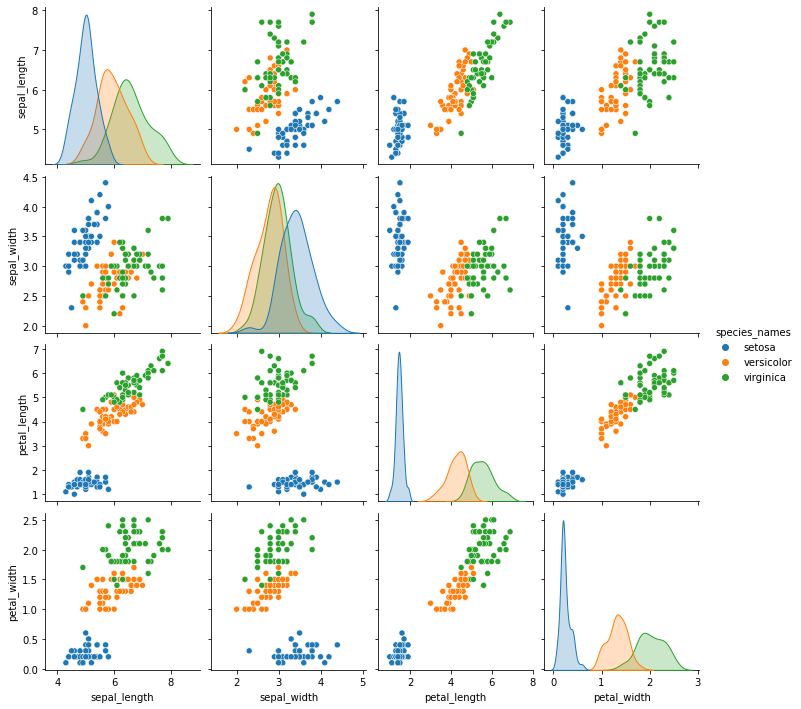

In [9]:
sns.pairplot(df,hue="species_names", kind="scatter")

###  Decison Tree Model


#### Decision Tree with max depth =2 

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [11]:
iris= load_iris()
X1 = iris.data[:, 2:] # petal length and width
y1 = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X1, y1)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X1, y1, test_size=0.3, random_state=0)
Decision_Tree = DecisionTreeClassifier(criterion='gini',min_samples_split=1.0,max_depth=2)
Decision_Tree.fit(X_train, Y_train)
Y_pred = Decision_Tree.predict(X_test)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print('Classification report:')
print(classification_report(Y_test,Y_pred))

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.00      0.00      0.00        18
           2       0.38      1.00      0.55        11

    accuracy                           0.60        45
   macro avg       0.46      0.67      0.52        45
weighted avg       0.45      0.60      0.49        45



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
print('Confusion Matrix:')
print(confusion_matrix(Y_test,Y_pred))

Confusion Matrix:
[[16  0  0]
 [ 0  0 18]
 [ 0  0 11]]


In [15]:
print('Accuracy Score:')
print(accuracy_score(Y_test,Y_pred))

Accuracy Score:
0.6


In [16]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=42)
iris = load_iris()


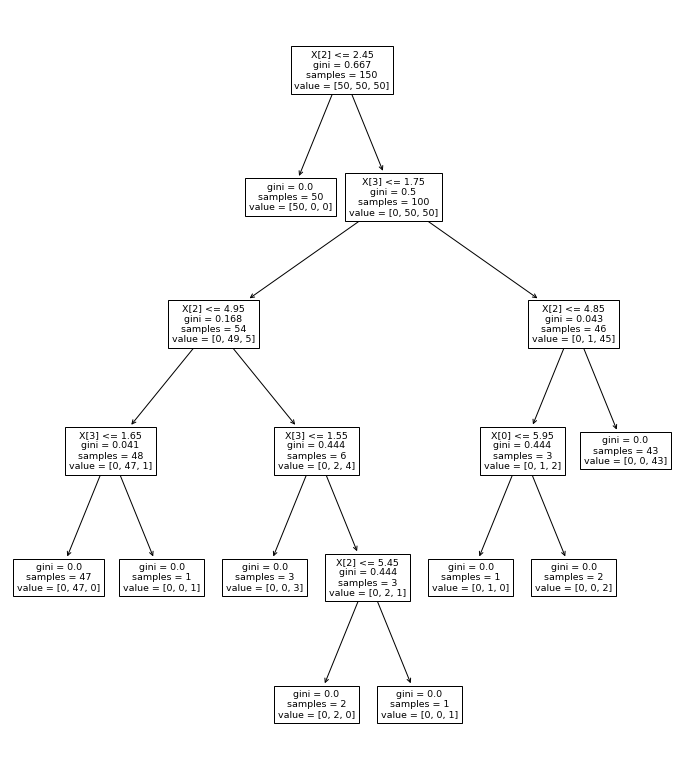

In [17]:
clf = clf.fit(iris.data, iris.target)
fig = plt.figure(figsize=(12,14))
tree.plot_tree(clf)
plt.show()

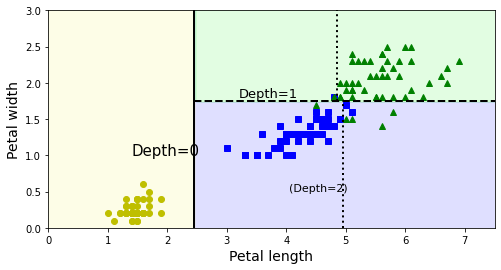

In [18]:
from matplotlib.colors import ListedColormap
import numpy as np
X1 = iris.data[:, 2:] # petal length and width
y1 = iris.target
def plot_decision_boundary(clf, X1, y1, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X1[:, 0][y1==0], X1[:, 1][y1==0], "yo", label="Iris setosa")
        plt.plot(X1[:, 0][y1==1], X1[:, 1][y1==1], "bs", label="Iris versicolor")
        plt.plot(X1[:, 0][y1==2], X1[:, 1][y1==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X1, y1)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()

#### Decision Tree without defining any max depth. i.e the tree will split till information gain is 0

In [19]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X1, y1)

DecisionTreeClassifier(random_state=42)

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X1, y1, test_size=0.3, random_state=0)
Decision_Tree = DecisionTreeClassifier(criterion='gini',min_samples_split=1.0)
Decision_Tree.fit(X_train, Y_train)
Y_pred = Decision_Tree.predict(X_test)

In [21]:
print('Accuracy Score:')
print(accuracy_score(Y_test,Y_pred))

Accuracy Score:
0.6


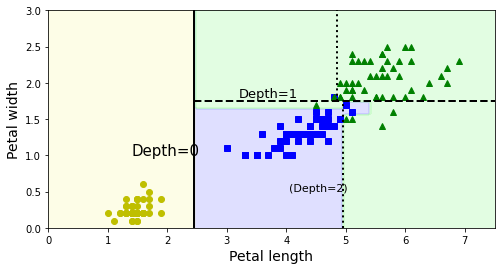

In [22]:
from matplotlib.colors import ListedColormap


def plot_decision_boundary(clf, X1, y1, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X1[:, 0][y1==0], X1[:, 1][y1==0], "yo", label="Iris setosa")
        plt.plot(X1[:, 0][y1==1], X1[:, 1][y1==1], "bs", label="Iris versicolor")
        plt.plot(X1[:, 0][y1==2], X1[:, 1][y1==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X1, y1)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()

### There are different ensemble methods such as bagging, boosting and voting classifier. We have used IRIS data set to check that which model is best suitable.

### 1. Voting Classifier: In this, we use same training set but different ML algorithms

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [24]:
X = iris.data  
y = iris.target

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state= 42)

In [26]:
svc = SVC()
knn = KNN()
dt = DecisionTreeClassifier()


In [27]:
classifiers = [('Support Vector classification', svc),('K Nearest Neighbours', knn),('Classification Tree', dt)]


In [28]:
for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))

Support Vector classification : 0.956
K Nearest Neighbours : 0.978
Classification Tree : 0.911


In [29]:
vc = VotingClassifier(estimators=classifiers)

In [30]:
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)

In [31]:
from sklearn import metrics
print('Accuracy of Voting Classifier: {:.3f}%'.format(metrics.accuracy_score(y_test, y_pred)*100))

Accuracy of Voting Classifier: 95.556%


### Plot

In [32]:
X1 = iris.data[:, 2:] # petal length and width
y1 = iris.target

In [33]:
classifiers1 = [('K Nearest Neighbours', knn),('Classification Tree', dt)]

In [34]:
vc1 = VotingClassifier(estimators=classifiers1)
vc1.fit(X1, y1)

VotingClassifier(estimators=[('K Nearest Neighbours', KNeighborsClassifier()),
                             ('Classification Tree', DecisionTreeClassifier())])

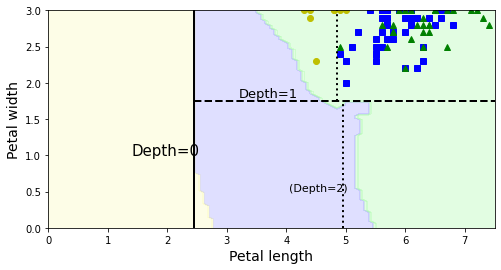

In [35]:
from matplotlib.colors import ListedColormap


def plot_decision_boundary(clf, X1, y1, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(vc1, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()

### 2. Bagging: In this we have same algorithm but different subsets of training set. The samples from the data are taken with replacement

In [36]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [37]:
X = iris.data  
y = iris.target

In [38]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state= 42)

In [39]:
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=42, criterion= 'gini')
bc = BaggingClassifier(base_estimator=dt, n_estimators=500, n_jobs=-1, max_samples= 100,bootstrap=True)
# n_jobs means the number of jobs to run in parallel for both fit and predict. 
# setting to -1 means using all processors.

In [40]:
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Bagging Classifier: {:.3f}%'.format(accuracy*100))

Accuracy of Bagging Classifier: 93.333%


In [41]:
# now checking the accuracy by calculating the information gain using shannon entropy

In [42]:
dt1 = DecisionTreeClassifier( min_samples_leaf=0.16, random_state=42, criterion= 'entropy')
bc1 = BaggingClassifier(base_estimator=dt1, n_estimators=500, n_jobs=1, max_samples= 100,bootstrap=True)
# setting the n_jobs to 1 this time and max_Depth None

In [43]:
bc1.fit(X_train, y_train)
y_pred = bc1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Bagging Classifier: {:.3f}%'.format(accuracy*100))

Accuracy of Bagging Classifier: 93.333%


In [44]:
# the above results shows that accuracy is same with both the criterion ie gini index and entropy 

#### OOB (Out of Bag Evaluation) : In bagging( which uses bootstrapping sampling) some data points might not be called at all. On average apprx 63% of the samples  are trained , rest other are not seen by the model at all. Hence we use these data points to estimate the performance without the need to cross validation. 

In [45]:
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=42, criterion= 'gini')
bc = BaggingClassifier(base_estimator=dt, n_estimators=500, n_jobs=-1, max_samples= 100,bootstrap=True,oob_score=True)
# setting the oob_score to True to estimate the performance of the model

In [46]:
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
oob_accuracy = bc.oob_score_
print('Test set accuracy: {:.3f}5'.format(test_accuracy*100))
print('OOB accuracy: {:.3f}%'.format(oob_accuracy*100))

Test set accuracy: 93.3335
OOB accuracy: 96.190%


### Plot

In [47]:
bc2 = BaggingClassifier(base_estimator=dt, n_estimators=500, n_jobs=-1, max_samples= 100,bootstrap=True)
bc2.fit(X1, y1)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                        min_samples_leaf=0.16,
                                                        random_state=42),
                  max_samples=100, n_estimators=500, n_jobs=-1)

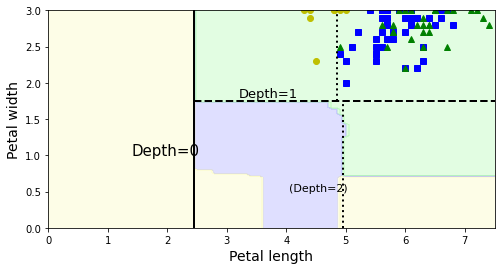

In [48]:
from matplotlib.colors import ListedColormap


def plot_decision_boundary(clf, X1, y1, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(bc2, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()

### 3. Random Forest : In this base estimator is decision tree. Each estimator is trained on different bootstrap sample. However, it has more randomness by using k features at each node without replacement where k < total features.

In [49]:
seed= 1 # setting the seed for reproducibilty 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=seed )

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
test_accuracy1= metrics.accuracy_score(y_test, y_pred)
print('Random Forest Accuracy is: {:.3f}'.format(test_accuracy1))

Random Forest Accuracy is: 0.978


#### Calculating the Feature Importance 

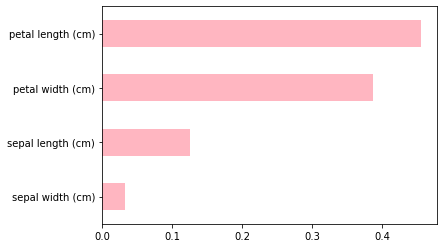

In [51]:
import matplotlib.pyplot as plt
importances_rf = pd.Series(rf.feature_importances_, index= iris["feature_names"])
sorted_importances_rf = importances_rf.sort_values()
sorted_importances_rf.plot(kind='barh', color='lightpink'); plt.show()

In [52]:
for name, importance_score in zip(iris["feature_names"], rf.feature_importances_):
    print(name, importance_score)

sepal length (cm) 0.12602766868662005
sepal width (cm) 0.03311849005976816
petal length (cm) 0.45468186118159715
petal width (cm) 0.3861719800720147


### Plot

In [53]:
rf2 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rf2.fit(X1, y1)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, random_state=42)

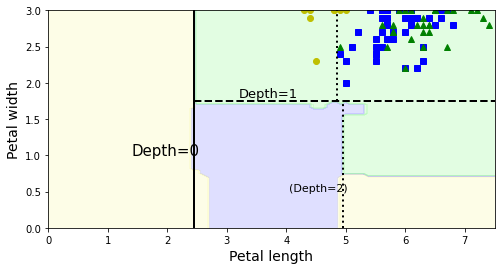

In [54]:
from matplotlib.colors import ListedColormap


def plot_decision_boundary(clf, X1, y1, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(rf2, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()

### 4 . Boosting : This is done by incrementally adapting the dataset used to train the models. Most popular methods are ADA(adaptive) boosting and gradient boosting.

### ADA(adaptive) boosting

In [55]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score


In [56]:
seed=1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state= seed)

In [57]:
dt = DecisionTreeClassifier(max_depth=1)

adaclf = AdaBoostClassifier(base_estimator=dt, n_estimators=10, algorithm="SAMME.R", learning_rate=0.01, random_state=seed)
adaclf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.01, n_estimators=10, random_state=1)

In [58]:
y_pred_proba = adaclf.predict_proba(X_test)
roc_auc_score = metrics.roc_auc_score(y_test, y_pred_proba, multi_class='ovr')


In [59]:
test_Accuracy= adaclf.score(X_test, y_test)
print('Accuracy Score: {:.3f}'.format(test_Accuracy))

Accuracy Score: 0.956


In [60]:
print('ROC AUC Score: {:.3f}'.format(roc_auc_score))

ROC AUC Score: 0.988


### Plot

In [61]:
adaclf2 = AdaBoostClassifier(base_estimator=dt, n_estimators=200, algorithm="SAMME.R", learning_rate=0.01, random_state=42)
adaclf2.fit(X1, y1)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.01, n_estimators=200, random_state=42)

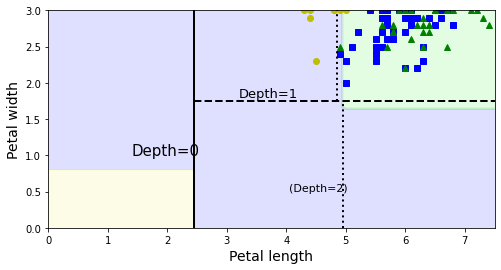

In [62]:
from matplotlib.colors import ListedColormap


def plot_decision_boundary(clf, X1, y1, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(adaclf2, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()

### Gradient boosting

In [63]:
from sklearn.ensemble import GradientBoostingClassifier


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state= 42)

In [65]:
# taking the learning rate as 0.01
gbt = GradientBoostingClassifier(n_estimators=300, max_depth=1, random_state=42, learning_rate= 0.01)

In [66]:
gbt.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=300,
                           random_state=42)

In [67]:
y_pred = gbt.predict(X_test)

In [68]:
test_Accuracy= gbt.score(X_test, y_test)
print('Accuracy Score: {:.3f}%'.format(test_Accuracy*100))

Accuracy Score: 97.778%


In [69]:
# taking the learning rate as 0.1
gbt = GradientBoostingClassifier(n_estimators=300, max_depth=1, random_state=42, learning_rate= 0.1)

In [70]:
gbt.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=1, n_estimators=300, random_state=42)

In [71]:
y_pred = gbt.predict(X_test)

In [72]:
test_Accuracy= gbt.score(X_test, y_test)
print('Accuracy Score: {:.3f}%'.format(test_Accuracy*100))

Accuracy Score: 93.333%


In [73]:
# taking the learning rate as 1
gbt = GradientBoostingClassifier(n_estimators=300, max_depth=1, random_state=42, learning_rate= 1)

In [74]:
gbt.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, max_depth=1, n_estimators=300,
                           random_state=42)

In [75]:
y_pred = gbt.predict(X_test)

In [76]:
test_Accuracy= gbt.score(X_test, y_test)
print('Accuracy Score: {:.3f}%'.format(test_Accuracy*100))

Accuracy Score: 93.333%


### Plot

In [77]:
gbt1 = GradientBoostingClassifier(n_estimators=300, max_depth=1, random_state=42, learning_rate= 1)
gbt1.fit(X1, y1)

GradientBoostingClassifier(learning_rate=1, max_depth=1, n_estimators=300,
                           random_state=42)

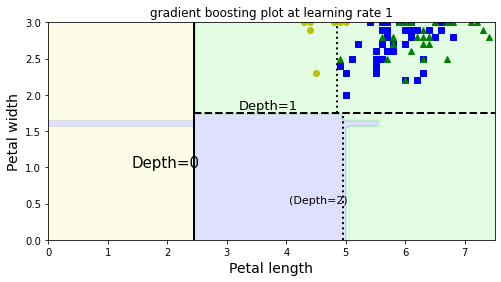

In [78]:
from matplotlib.colors import ListedColormap


def plot_decision_boundary(clf, X1, y1, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(gbt1, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.title("gradient boosting plot at learning rate 1", size= 12)
plt.show()

In [79]:
gbt2 = GradientBoostingClassifier(n_estimators=300, max_depth=1, random_state=42, learning_rate= 0.01)
gbt2.fit(X1, y1)

GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=300,
                           random_state=42)

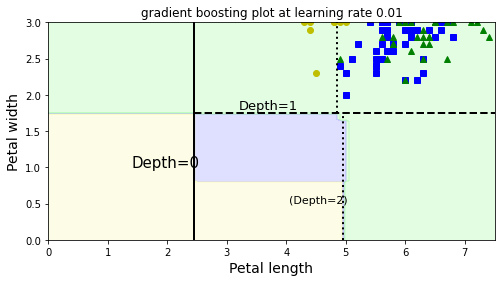

In [80]:
from matplotlib.colors import ListedColormap


def plot_decision_boundary(clf, X1, y1, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(gbt2, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.title("gradient boosting plot at learning rate 0.01", size= 12)
plt.show()

### Measuring the accuracy through cross val score

In [81]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.model_selection import cross_val_score

adaboosting = AdaBoostClassifier(n_estimators=100)
gradientboosting = GradientBoostingClassifier(n_estimators=100)


ensemblemodel = EnsembleVoteClassifier(clfs=[adaboosting, gradientboosting], voting='hard')
labels = ['Ada Boosting', 'Gradient Boosting', 'Ensemble model']

for model, labels in zip([adaboosting, gradientboosting, ensemblemodel], labels):
    scores = cross_val_score(model, X1, y1, cv=4, scoring='accuracy')
    print("Accuracy: {0:.3f}%, Variance:{1:.3f} [{2}]".format(scores.mean()*100, scores.std(), labels))

Accuracy: 95.324%, Variance:0.040 [Ada Boosting]
Accuracy: 96.675%, Variance:0.022 [Gradient Boosting]
Accuracy: 95.324%, Variance:0.040 [Ensemble model]


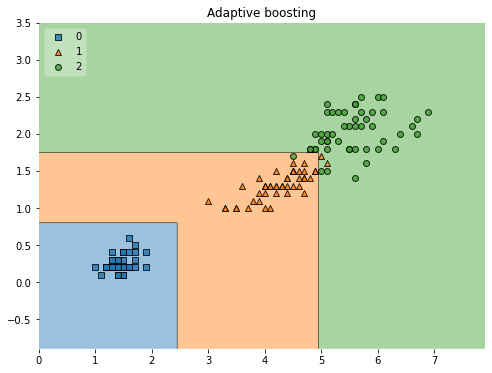

In [82]:
from mlxtend.plotting import plot_decision_regions
fig = plt.figure(figsize=(8,6))
clf= adaboosting.fit(X1,y1)
plot_decision_regions(X1, y1, clf=clf, legend=2)
plt.title("Adaptive boosting", size= 12)
plt.show()

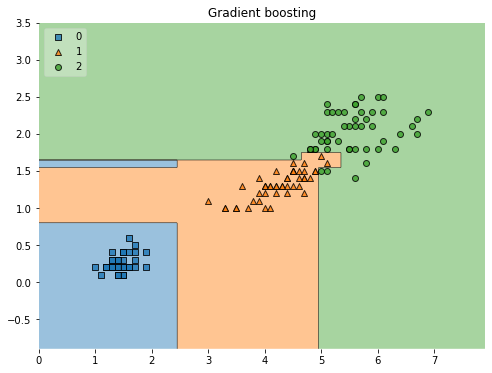

In [83]:
from mlxtend.plotting import plot_decision_regions
fig = plt.figure(figsize=(8,6))

clf= gradientboosting.fit(X1,y1)
plot_decision_regions(X1, y1, clf=clf, legend=2)
plt.title("Gradient boosting", size= 12)
plt.show()

## Results 

